# Performance Comparison of SHA-256, SHA-1, Blake2b, Blake2s, and etc.

### Author: Sae Hyong Park

0 sha256 performed 10000 operations in 12 [0.01655292510986328, 0.019435882568359375, 0.04808998107910156, 0.07966208457946777, 0.11431217193603516, 0.1418170928955078, 0.17095303535461426, 0.2027132511138916, 0.23244428634643555, 0.2606847286224365, 0.29341793060302734, 0.3297910690307617] 

1 sha1 performed 10000 operations in 12 [0.021840810775756836, 0.017171859741210938, 0.030596017837524414, 0.04447793960571289, 0.06154966354370117, 0.07628202438354492, 0.0908961296081543, 0.10429620742797852, 0.12131214141845703, 0.1334538459777832, 0.14550495147705078, 0.15669608116149902] 

2 blake2b performed 10000 operations in 12 [0.012243986129760742, 0.013244867324829102, 0.028073787689208984, 0.04415488243103027, 0.06268811225891113, 0.07866597175598145, 0.09516525268554688, 0.11022305488586426, 0.1296539306640625, 0.1431269645690918, 0.15890908241271973, 0.17310404777526855] 

3 blake2s performed 10000 operations in 12 [0.01070094108581543, 0.012459039688110352, 0.03006887435913086, 0.0

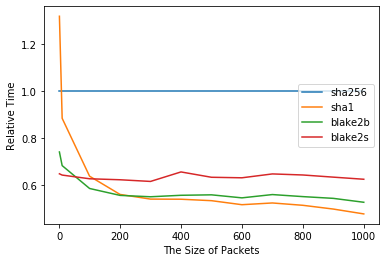

In [1]:
from hashcompare import Hash
from hashlib import sha1, sha256, blake2b, blake2s, sha3_224, md5
from zlib import crc32
import time
import inspect
import numpy as np
import copy

## Simulation Set-up 
#### simulated_packet denotes 10 byte
#### x_range denotes 1 to 1000 times the size of the simulated_packet
#### The smallest being 10 bytes and the largest being 10000 bytes or 10k bytes

In [2]:
x_range = [100,200,300,400,500,600,700,800, 900, 1000]
names_of_hashes = ['sha256','sha1','blake2b','blake2s','sha3_224', 'md5']

hash_mapper = [Hash(sha256(),names_of_hashes[0]), Hash(sha1(),names_of_hashes[1]),
               Hash(blake2b(),names_of_hashes[2]), Hash(blake2s(), names_of_hashes[3]), 
               Hash(sha3_224(), names_of_hashes[4]), Hash(md5(),names_of_hashes[5])]
hash_mapper = np.array(hash_mapper)

test_mapper = [Hash(sha256(),names_of_hashes[0]), Hash(sha1(),names_of_hashes[1]),
               Hash(blake2b(),names_of_hashes[2]), Hash(blake2s(), names_of_hashes[3]), 
               Hash(sha3_224(), names_of_hashes[4]), Hash(md5(),names_of_hashes[5])]
test_mapper = np.array(test_mapper)

simulated_packet = "abcdefghij"
packet= []
for weight in x_range:
    packet.append(simulated_packet * weight)
    
for idx, hash_f in enumerate(hash_mapper):

    for i in range(len(x_range)):
        hash_mapper[idx].set_start(time.time())
        for j in range(Hash.NUM_OF_ROUNDS):
            #packet = simulated_packet*i
            hash_f.update(packet[i].encode())
            hash_v = hash_f.digest()

        hash_mapper[idx].set_finish(time.time())

    print("{} {} performed {} operations in {} {} \n".format
        (idx, hash_mapper[idx].get_name(), Hash.NUM_OF_ROUNDS,  len(hash_mapper[idx].get_duration()), hash_mapper[idx].get_duration()))

0 sha256 performed 10000 operations in 10 [0.047927141189575195, 0.07792210578918457, 0.11214208602905273, 0.14314723014831543, 0.17215609550476074, 0.2705962657928467, 0.2624938488006592, 0.2633788585662842, 0.2921879291534424, 0.3250918388366699] 

1 sha1 performed 10000 operations in 10 [0.030852079391479492, 0.043624162673950195, 0.06348299980163574, 0.07678699493408203, 0.0924990177154541, 0.10477972030639648, 0.12032508850097656, 0.13342523574829102, 0.14602184295654297, 0.1593787670135498] 

2 blake2b performed 10000 operations in 10 [0.029592037200927734, 0.04457592964172363, 0.06393694877624512, 0.07961797714233398, 0.09517383575439453, 0.11063671112060547, 0.12945818901062012, 0.1458580493927002, 0.16172218322753906, 0.1758410930633545] 

3 blake2s performed 10000 operations in 10 [0.03092193603515625, 0.049817800521850586, 0.07192087173461914, 0.09194588661193848, 0.11014509201049805, 0.1290576457977295, 0.1510448455810547, 0.16867709159851074, 0.18685007095336914, 0.2048182

# How many second does it take to perform one hashing?
#### It takes about one millionth of a second for one hashing to be performed.

In [3]:
for idx, hash_f in enumerate(test_mapper):
    test_mapper[idx].set_start(time.time())
    for j in range(1000000):
        hash_f.update(packet[0].encode())
        hash_v = hash_f.digest()
    test_mapper[idx].set_finish(time.time())

for idx, hash_f in enumerate(test_mapper):
    print("performed 1 operation in {} \n".format(test_mapper[idx].get_duration()[0]))
    #print("{0:s} performed 1 operation in {1:.2f} \n".format(test_mapper[idx].get_name(), test_mapper[idx].get_duration()))

performed 1 operation in 4.765318870544434 

performed 1 operation in 2.983126640319824 

performed 1 operation in 2.8690638542175293 

performed 1 operation in 3.169764995574951 

performed 1 operation in 6.567994832992554 

performed 1 operation in 3.0649726390838623 



## Measure arithmetic calculations one million times

In [4]:
start = time.time()
for i in range(1000000):
    finish = time.time()
    random1 = finish * 12 / 3.0 + 1234
    random2 = start * 124 / 4.2  + 234
    random3 = finish * 324 / 3.4 + 2344
    random4 = start * 2346 / 5.2 + 424324
    random6 = finish * 42310 / 13.0 + 23423432
    random7 = start * 12349 / 14.2 + 232.033
    random8 = finish * 4448 / 13.4 
    random9 = start * 12347 / 25.2
    duration = finish - start

print("performed operation in {} \n".format(duration))

performed operation in 1.097944974899292 



## Graph Analysis

In [5]:
default_duration = np.array(hash_mapper[0].get_duration())

import pandas as pd
import matplotlib.pyplot as plt
default_duration = pd.DataFrame(default_duration)

        sha256      sha1   blake2b   blake2s  sha3_224      md5
100   0.047927  0.030852  0.029592  0.030922  0.067462  0.03196
200   0.047927  0.030852  0.029592  0.030922  0.067462  0.03196
300   0.047927  0.030852  0.029592  0.030922  0.067462  0.03196
400   0.047927  0.030852  0.029592  0.030922  0.067462  0.03196
500   0.047927  0.030852  0.029592  0.030922  0.067462  0.03196
600   0.047927  0.030852  0.029592  0.030922  0.067462  0.03196
700   0.047927  0.030852  0.029592  0.030922  0.067462  0.03196
800   0.047927  0.030852  0.029592  0.030922  0.067462  0.03196
900   0.047927  0.030852  0.029592  0.030922  0.067462  0.03196
1000  0.047927  0.030852  0.029592  0.030922  0.067462  0.03196


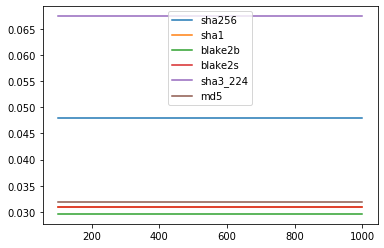

In [6]:

#print(len(x_range))
zero_data = np.zeros(shape=(12,1))
zero_series = pd.Series(zero_data[:,0])
#print(zero_series)
plot_result2 = pd.DataFrame({names_of_hashes[0]: zero_series, names_of_hashes[1]: zero_series,
                   names_of_hashes[2]: zero_series, names_of_hashes[3]: zero_series}, index=x_range)
#print(plot_result2)
for idx, hash_f in enumerate(hash_mapper):
    plot_result2[names_of_hashes[idx]] = np.array(hash_mapper[idx].get_duration()[0])
    #print(hash_mapper[idx].get_duration())

plot_result2.plot()
print(plot_result2)    

#### Sha-256 is used as the baseline performance measurement unit and the Y-axis shows the relative time they needed to perform a hashing. X-axis show the packet size and the unit is 10 bytes, meaning 200 denotes 2k bytes, 400 4k bytes and so on.
#### The graph shows that sha-1 has the best performance for larger packets. However, sha-1 is known to be vulnerable due to high probability of hash colision.

In [7]:
plot_result = {}
relative_performance = {}
for idx, hash_f in enumerate(hash_mapper):
    hash_mapper[idx].duration = pd.DataFrame(hash_mapper[idx].get_duration())
    hash_mapper[idx].duration.name = hash_mapper[idx].get_name()

    relative_performance.update({idx: hash_mapper[idx].get_duration()/default_duration})
    #print(relative_performance[idx])
    alist = []
    for item in relative_performance[idx].values:
        alist.append(item)
        #nlist = np.asanyarray(alist)
        plot_result.update({hash_mapper[idx].get_name():alist})

plot_result =  pd.DataFrame(plot_result, index=x_range)
plot_result.sha256 = plot_result.sha256.astype(float)
plot_result.sha1 = plot_result.sha1.astype(float)
plot_result.blake2b = plot_result.blake2b.astype(float)
plot_result.blake2s = plot_result.blake2s.astype(float)
plot_result.sha3_224 = plot_result.sha3_224.astype(float)
plot_result.md5 = plot_result.md5.astype(float)

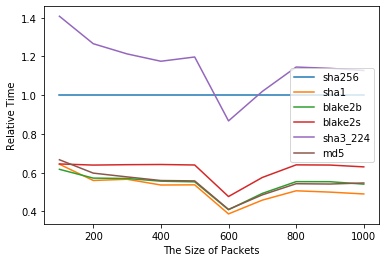

In [8]:
ax = plot_result.plot()
ax.set_xlabel("The Size of Packets")
ax.set_ylabel("Relative Time")
ax.legend(loc='center right')
plt.show()